path: [(15.0, 8.0), (16.0, 8.0), (17.0, 8.0), (18.0, 8.0), (19.0, 8.0), (20.0, 8.0), (21.0, 7.0), (22.0, 7.0), (23.0, 7.0), (24.0, 7.0), (25.0, 7.0), (26.0, 8.0), (27.0, 9.0), (28.0, 10.0), (29.0, 11.0)]


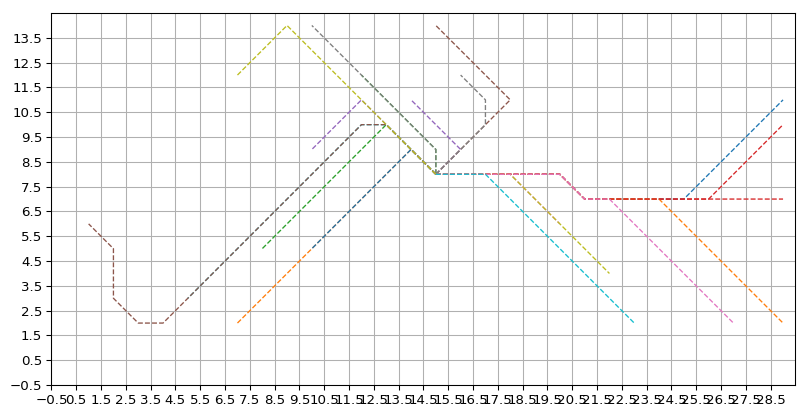

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from envSetup import EnvSetup
from customizedShape import CustomizedShape
from pathfinder import Pathfinder

map_width = EnvSetup().map_width
map_height = EnvSetup().map_height
n_robot = EnvSetup().n_robot
n_target = EnvSetup().n_target

data_robot = np.zeros(n_robot, dtype=[('position', float, 2),
                                      ('color',    float, 4)])

data_robot['position'] = np.array(EnvSetup().nodes_robot_initializer)
data_robot['color'] = np.repeat([[0., 1., 0., 1.]], n_robot, axis=0)


pathfinderObject = Pathfinder()
pathfinderObject.breadth_first_search()
# path = [[path_robot_1], [path_robot_2], ..., [path_robot_n]]
path = []
x = []
y = []
for robot_i  in np.arange(n_robot):
    path.append(pathfinderObject.reconstruct_path(tuple(data_robot['position'][robot_i])))
    x.append([path[robot_i][ix][0] for ix in range(len(path[robot_i]))])
    y.append([path[robot_i][ix][1] for ix in range(len(path[robot_i]))])
    
        
    
fig = plt.figure(num="besiege", figsize=(10, 10), dpi=96, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0-0.5, map_width-0.5)
ax.set_ylim(0-0.5, map_height-0.5)
ax.set_aspect('equal')    
x_ticks = np.arange(0-0.5, map_width-0.5, 1)
y_ticks = np.arange(0-0.5, map_height-0.5, 1)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.grid(True)


print("path:",path[0])
# path[0][0]
# x = [path[0][ix][0] for ix in range(len(path[0]))]
# y = [path[0][ix][1] for ix in range(len(path[0]))]
# print("x:", x)
# print("y:", y)
# print("shape:", np.array(x).shape)

lines = []
for ix in np.arange(len(x)):
    lines.append(plt.plot(x[ix], y[ix], '--', lw=1))

# lines
    
# ani = animation.ArtistAnimation(fig, lines)

# x = np.arange(30)
# y = np.sin(x)
# line, = plt.plot(x[1], y[1], '--', lw=1)
# line, = ax.plot(np.array(x), np.array(y), 'o-', lw=1)
# line.set_data([], [])

plt.show()